In [1]:
import argparse

import numpy as np
import tensorflow as tf
#import tensorflow.keras.backend as K

import matplotlib.pyplot as plt

#from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.regularizers import l2

import glob
import os
import cv2
import tensorflow.keras as keras


import time
import argparse

from tqdm import tqdm

from tensorflow.keras.models import load_model, Model


In [2]:
cd ../utils

D:\guided-retraining\utils


In [3]:
import utils_guided_retraining2 as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "fashion"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test",True)

D:/guided-retraining/data/fashion/x_test.npy
x_set len:  7001
D:/guided-retraining/data/fashion/y_test.npy
y_set len:  7001


In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary",True)

D:/guided-retraining/data/data_adversarial_july/fashion/train_and_adversary.npy
x_set len:  55998
D:/guided-retraining/data/data_adversarial_july/fashion/train_and_adversary_labels.npy
y_set len:  55998


In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial',True) 

D:/guided-retraining/data/data_adversarial_july/fashion/test_and_adversary.npy D:/guided-retraining/data/data_adversarial_july/fashion/test_and_adversary_labels.npy
D:/guided-retraining/data/data_adversarial_july/fashion/test_and_adversary.npy
x_set len:  14000
D:/guided-retraining/data/data_adversarial_july/fashion/test_and_adversary_labels.npy
y_set len:  14000


In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"
elif(dataset == 'fashion'):
    model_dir = "D:/guided-retraining/models/model_fashion_2"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

D:/guided-retraining/models/model_fashion_2
D:/guided-retraining/models/model_fashion_2
Model loaded correctly


In [10]:
data_dir = "D:/models/aug_22"

config = "C1"
config_lc = "c1"
num_models = 20

## Loading models

In [13]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C1_2/"+dataset+"_model_c1_may_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_lsa_e1_11
Model loaded correctly
D:/models/aug_22/fashion/C

In [14]:
len(models_lsa)

20

In [13]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C1_2/"+dataset+"_model_c1_may_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dsa_e1_11
Model loaded correctly
D:

In [14]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C1_2/"+dataset+"_model_c1_may_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_dg_e1_11
Model loaded correctly
D:/models/aug_

In [15]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C1_2/"+dataset+"_model_c1_may_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1_2/fashion_model_c1_may_se_e1_11
Model loaded correctly
D:/models/aug_

In [18]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_may_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_random_e1_11
Model loaded 

In [19]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_may_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_0
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_1
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_2
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_3
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_4
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_5
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_6
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_7
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_8
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_9
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_10
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_model_c1_may_nc_e1_11
Model loaded correctly
D:/models/aug_22/fashion/C1/fashion_mo

## Evaluating

In [16]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [17]:
#evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
#valuate_nc = []
#valuate_random = []

#valuate_lsa.append([0,0,0,0])
evaluate_dsa.append([0,0,0,0])
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])
#valuate_nc.append([0,0,0,0])
#valuate_random.append([0,0,0,0])

In [18]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
"""
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    

print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
"""

Evaluating for dsa
 69/438 [===>..........................] - ETA: 5s - loss: 0.3105 - accuracy: 0.9013 - precision_18: 0.9307 - recall_18: 0.8397

In [19]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


In [21]:
len(evaluate_dg)

In [25]:
len(evaluate_nc)

21

In [22]:
import pandas as pd

#df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

#df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
#df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [25]:
save_dir = "D:/models/aug_22/"+dataset+"/csv_good/"+config_lc

In [26]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)
    

In [14]:
import pandas as pd
loading_csv_2 = True
if(loading_csv_2):
    save_dir_2 = "D:/models/aug_22/"+dataset+"/csv/"+config_lc
    
    df_evaluate_lsa = pd.read_csv(save_dir_2+"/lsa_"+config_lc)
    #df_evaluate_dsa = pd.read_csv(save_dir_2+"/dsa_"+config_lc)
    #df_evaluate_dg = pd.read_csv(save_dir_2+"/dg_"+config_lc)
    #df_evaluate_se = pd.read_csv(save_dir_2+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir_2+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir_2+"/nc_"+config_lc)
    

In [27]:
config_lc

'c1'

In [27]:
if(not loading_csv):
    #df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
    df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
    df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
    df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
    #df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
    #df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [28]:

metric ="accuracy"
#accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

#accuracy_nc_3 =np.array(df_evaluate_nc[metric])
#accuracy_random_3 = np.array(df_evaluate_random[metric])


In [29]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [18]:
n_data_points = 2800

In [19]:
len(accuracy_dsa_3)

21

In [20]:
if(len(accuracy_dsa_3)>21):
    n_inputs = [n_data_points*i for i in range(num_models+1)]
else:
    n_inputs = [n_data_points*i for i in range(num_models)]
    
n_inputs.append(len(x_train_and_adversary))
print(len(n_inputs))
n_inputs

21


[0,
 2800,
 5600,
 8400,
 11200,
 14000,
 16800,
 19600,
 22400,
 25200,
 28000,
 30800,
 33600,
 36400,
 39200,
 42000,
 44800,
 47600,
 50400,
 53200,
 55998]

In [21]:
print(len(df_evaluate_dsa))
print(len(n_inputs))

21
21


In [30]:
save_dir = "D:/models/aug_22/"+dataset+"/csv_good/"+config

In [31]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

33600 0.9071428775787354
44800 0.9035714268684388
44800 0.9061428308486938


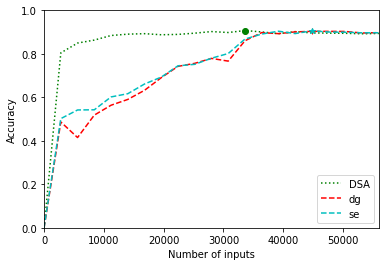

In [23]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
#plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
#plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [
                    #Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   #Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   #Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])
                    ]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

#print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
#print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
#print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

#plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
#plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
#plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()

55998 0.9011428356170654
33600 0.9071428775787354
44800 0.9035714268684388
44800 0.9061428308486938
44800 0.9018571376800536
47600 0.8929286003112793


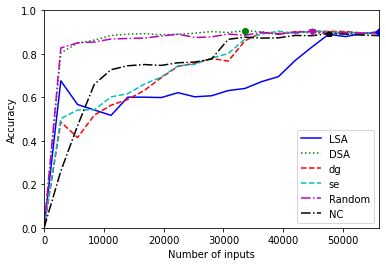

In [26]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [
                    Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])
                    ]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()

55998 0.9011428356170654
33600 0.9071428775787354
44800 0.9035714268684388
44800 0.9061428308486938
44800 0.9018571376800536
47600 0.8929286003112793


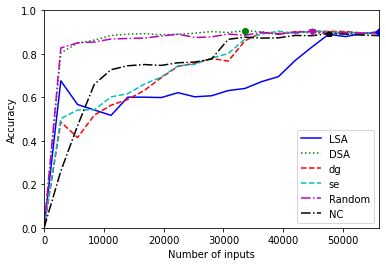

In [32]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [
                    Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])
                    ]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()